In [97]:
import os
import numpy as np
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from skimage.filters import gaussian
from skimage.util import random_noise
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D,Dropout,MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy

In [98]:
# accsess the data files and dir
cancer_rays_dir     = os.listdir("breast-cancer-classification/datasets/original/IDC_regular_ps50_idx5/") 
all_rays_dir        = "all_rays_dir"  # is this path we will put all the images
cancer_rays_dir_str ="breast-cancer-classification/datasets/original/IDC_regular_ps50_idx5/"

In [99]:
print(cancer_rays_dir)
print(len(cancer_rays_dir))

['10282', '10288', '12933', '15472', '13692', '12954', '16568', '12883', '12951', '10307', '12824', '12896', '15634', '12882', '13106', '14210', '13404', '14154', '12819', '12880', '12242', '12751', '10255', '12910', '12932', '15514', '10286', '10290', '13403', '12909', '15473', '15513', '14082', '15515', '12811', '14079', '10278', '12930', '10256', '12897', '12823', '12905', '14305', '16085', '12868', '13617', '16014', '15471', '12949', '14304', '13693', '12931', '10293', '16553', '14191', '10306', '12875', '12748', '10264', '10253', '16166', '12626', '12817', '12900', '10261', '13019', '12879', '12869', '15903', '14192', '12935', '16534', '12907', '14306', '16896', '12872', '13018', '14188', '12867', '12878', '13613', '14156', '13020', '14155', '13022', '14190', '12750', '13694', '10277', '12895', '13461', '10262', '10275', '12826', '13666', '12955', '12870', '13400', '13462', '13687', '13691', '12908', '10276', '16165', '13460', '13916', '14081', '12911', '10274', '16533', '13458', 

To facilitate the process of dealing with screening mammograms images, we will collect all the images in one place, while retaining ownership of each image and its class as well...

In [100]:
#os.mkdir(all_rays_dir) 
all_rays_dir_lst = os.listdir('./all_rays_dir') #get all images from this directory: /home/hp/Documents/DATA_SCIENCE/MACHINE_LEARNING_PROJECT/breast-cancer-classification/all_rays_dir
len(all_rays_dir_lst)

277524

In [101]:
#Here we will move the images, but by adding a small part in their path, which indicates that they are negative or positive
for patient in cancer_rays_dir:   
    path_0 = cancer_rays_dir_str + str(patient) + '/0'
    path_1 = cancer_rays_dir_str + str(patient) + '/1'
    file_list_0 = os.listdir(path_0) # get all the image files in the path_0
    file_list_1 = os.listdir(path_1) # get all the image files in the path_1
    #copy the image files from the original dataset folder "path_0" to the destination folder "all_rays_dir"
    for fname in file_list_0:
            src = os.path.join(path_0, fname) # source dataset
            dst = os.path.join(all_rays_dir, fname) # destination dataset
            shutil.copyfile(src, dst)
    for fname in file_list_1:
        src = os.path.join(path_1, fname)
        dst = os.path.join(all_rays_dir, fname)
        shutil.copyfile(src, dst)

In [104]:
#Then, it's time to put images in a data_frame for easy access:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
data.head()

,image_id
0,10299_idx5_x1851_y2251_class1.png
1,16550_idx5_x2251_y2351_class0.png
2,12954_idx5_x2201_y601_class0.png
3,10302_idx5_x901_y601_class0.png
4,13693_idx5_x2401_y1451_class0.png


In [ ]:
#Based on the addition that we added earlier in the path, we divide the data. 
# Image's names has a format [0]_[1]_[2]_[3]_[4].png ->use split() function to separate them
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] # target is either 0 or 1
   # print("x is:", x, "----- a = ", a, " ----- b = ", b, "----- target = ", target)
    return target

data['target'] = data['image_id'].apply(extract_target) # define column 'target'


In [106]:
data['target'].value_counts()

target
0    198738
1     78786
Name: count, dtype: int64

In [107]:
y = data['target']
data_train, data_test = train_test_split(data, test_size=0.10, random_state=101, stratify=y)
print("----- training data ----- ")
print(data_train)
print("----- testing data ----- ")
print(data_test)

----- training data ----- 
                                 image_id target
59557    12824_idx5_x1851_y201_class0.png      0
13319    12890_idx5_x1501_y551_class0.png      0
271044  15514_idx5_x1401_y1951_class0.png      0
50462      8974_idx5_x401_y751_class0.png      0
180418  13400_idx5_x2601_y2351_class0.png      0
...                                   ...    ...
216053   9383_idx5_x1451_y1701_class0.png      0
165089   13688_idx5_x651_y1401_class0.png      0
252183  10268_idx5_x2001_y1601_class0.png      0
80727   12894_idx5_x2301_y2651_class0.png      0
107225  16165_idx5_x3201_y1151_class0.png      0

[249771 rows x 2 columns]
----- testing data ----- 
                                 image_id target
264310    9290_idx5_x2251_y451_class0.png      0
17213    9226_idx5_x2201_y2301_class0.png      0
83037    9123_idx5_x1901_y2051_class0.png      0
83144    8918_idx5_x2051_y2051_class0.png      0
141960  13916_idx5_x2001_y1201_class0.png      0
...                                   

In [109]:
train = data_train.image_id
test  = data_test.image_id
print("train ")
print(train)

train 
59557      12824_idx5_x1851_y201_class0.png
13319      12890_idx5_x1501_y551_class0.png
271044    15514_idx5_x1401_y1951_class0.png
50462        8974_idx5_x401_y751_class0.png
180418    13400_idx5_x2601_y2351_class0.png
                        ...                
216053     9383_idx5_x1451_y1701_class0.png
165089     13688_idx5_x651_y1401_class0.png
252183    10268_idx5_x2001_y1601_class0.png
80727     12894_idx5_x2301_y2651_class0.png
107225    16165_idx5_x3201_y1151_class0.png
Name: image_id, Length: 249771, dtype: object


In [110]:
data.set_index('image_id', inplace=True)
for image in train:
    fname  = image
    target = data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('train_dir', label, fname)
    shutil.copyfile(src, dst)

In [111]:
for image in test:
    fname = image
    target = data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("test_dir", label, fname)
    shutil.copyfile(src, dst)

In [112]:
print('non-IDC train      =',len(os.listdir('train_dir/zeros')))
print('IDC train          =',len(os.listdir('train_dir/ones')))
print('non-IDC validation =',len(os.listdir('test_dir/zeros')))
print('IDC validation     =',len(os.listdir('test_dir/ones')))

non-IDC train      = 180174
IDC train          = 71307
non-IDC validation = 21183
IDC validation     = 8266


In [113]:
data_generation = ImageDataGenerator(rescale=1.0/255)

In [114]:
train_generation = data_generation.flow_from_directory(
                                        "train_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')
test_generation = data_generation.flow_from_directory(
                                        "test_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')

Found 251481 images belonging to 2 classes.
Found 29449 images belonging to 2 classes.


MODELLING

In this step, I define a model consisting of 4 convolutional layers/hidden layers Conv2D(), activation function is Rectified Linear Units (ReLu), and the input of shape (25, 25, 3). I will then add the max-pooling layer with MaxPooling2D() after each convolutional layer. 
After 4 conv layers, I will flatten the 3D output to 1D using Flatten(), then add one Dense layer/fully connected layer on top to perform classification, this layer includes 64 nodes. To avoid the overfitting issue occuring while training, I add drop out = 0.5. The last Dense layer has a softmax activation function with 2 outputs corresponding to 2 classes of the problem, i.e IDC and non IDC classes.

In [115]:
model = Sequential()
# 1st Conv layer has 32 - 3x3 filters/kernels
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(25, 25, 3))) 
#image_height=25, image_width=25, image_depth=3(R,G,B)

# 2nd Conv layer has 32 - 3x3 filters/kernels
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))   # max-pooling layers each of size 2x2

# 3rd Conv layer has 64 - 3x3 filters/kernels
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2))) 

# 4nd Conv layer has 64 - 3x3 filters/kernels
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

#flatten (or unroll) the 3D output to 1D
model.add(Flatten()) 

#add two Dense layers/fully connected layers on top to perform classification. This layer has 64 nodes
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
#in order to avoid overfitting, adding dropout=0.5
model.add(Dropout(0.5))
#This following dense layer uses a softmax activation function to produce a probability distribution over the classes. Here we have 2 classes: IDC and non IDC => Dense(2)
model.add(Dense(2, activation='softmax')) 
model.summary()

/home/hp/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 25, 25, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 25, 25, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,626 (400.88 KB)

 Trainable params: 102,626 (400.88 KB)

 Non-trainable params: 0 (0.00 B)

COMPILE THE MODEL

Once the model is created, I compile it with Adam optimizer, a common optimization algorithm with learning rate = 1e-06. I pick this small number of learning rate to let the model learns the dataset slower but deeper compared to a large value. The loss function is the binary cross-entropy which is used to multi-class classification. Lastly, I specify the metrics as accuracy which I want to analyze while the model is training.


In [116]:
#compile model
model.compile(Adam(learning_rate= 1e-4), loss='binary_crossentropy', metrics=['accuracy'])

TRAIN THE MODEL

The model will be fit for 10 training epochs, the validation dataset is the test dataset. 

In [117]:
model.fit(train_generation,validation_data=test_generation, epochs= 10, verbose=1)

Epoch 1/10
   23/25149 ━━━━━━━━━━━━━━━━━━━━ 1:58 5ms/step - accuracy: 0.5461 - loss: 0.9196 

/home/hp/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25149/25149 ━━━━━━━━━━━━━━━━━━━━ 122s 5ms/step - accuracy: 0.8092 - loss: 0.4343 - val_accuracy: 0.8509 - val_loss: 0.3487
Epoch 2/10
25149/25149 ━━━━━━━━━━━━━━━━━━━━ 127s 5ms/step - accuracy: 0.8479 - loss: 0.3592 - val_accuracy: 0.8538 - val_loss: 0.3387
Epoch 3/10
25149/25149 ━━━━━━━━━━━━━━━━━━━━ 128s 5ms/step - accuracy: 0.8586 - loss: 0.3359 - val_accuracy: 0.8638 - val_loss: 0.3148
Epoch 4/10
25149/25149 ━━━━━━━━━━━━━━━━━━━━ 125s 5ms/step - accuracy: 0.8649 - loss: 0.3230 - val_accuracy: 0.8654 - val_loss: 0.3102
Epoch 5/10
25149/25149 ━━━━━━━━━━━━━━━━━━━━ 127s 5ms/step - accuracy: 0.8686 - loss: 0.3119 - val_accuracy: 0.8703 - val_loss: 0.3019
Epoch 6/10
25149/25149 ━━━━━━━━━━━━━━━━━━━━ 104s 4ms/step - accuracy: 0.8720 - loss: 0.3051 - val_accuracy: 0.8710 - val_loss: 0.3020
Epoch 7/10
25149/25149 ━━━━━━━━━━━━━━━━━━━━ 107s 4ms/step - accuracy: 0.8745 - loss: 0.2999 - val_accuracy: 0.8746 - val_loss: 0.2943
Epoch 8/10
25149/25149 ━━━━━━━━━━━━━━━━━━━━ 110s 4ms/step - accuracy: 0.8

This code snippet shows the training and validation accuracy and loss values for a neural network model over 10 epochs.
• The model is trained on a dataset of 249771 samples and validated on a dataset of 27753 samples.
• During each epoch, the model is trained on the training dataset and the validation accuracy and loss values are calculated on the validation dataset.
• The accuracy and val_accuracy values represent the accuracy of the model on the training and validation datasets, respectively.
• The loss and val_loss values represent the loss of the model on the training and validation datasets, respectively.
• The fit method of the Keras API is used to train the model.
• The fit method takes in the training and validation datasets, the number of epochs to train for, and other parameters such as batch size and optimizer.
• Overall, this code snippet shows the training and validation performance of a neural network model over multiple epochs.

OUTCOMES

In [118]:
model_train = pd.DataFrame(model.history.history)
model_train.head(10)

,accuracy,loss,val_accuracy,val_loss
0,0.828218,0.400456,0.850895,0.348684
1,0.850565,0.352869,0.853781,0.338700
2,0.859373,0.333418,0.863832,0.314804
3,0.865028,0.321132,0.865394,0.310187
4,0.868650,0.312420,0.870250,0.301931
5,0.871529,0.305908,0.870963,0.302013
6,0.874659,0.299709,0.874631,0.294279
7,0.876523,0.294442,0.875310,0.291752
8,0.879045,0.288722,0.872593,0.301173
9,0.881255,0.283450,0.875989,0.292180


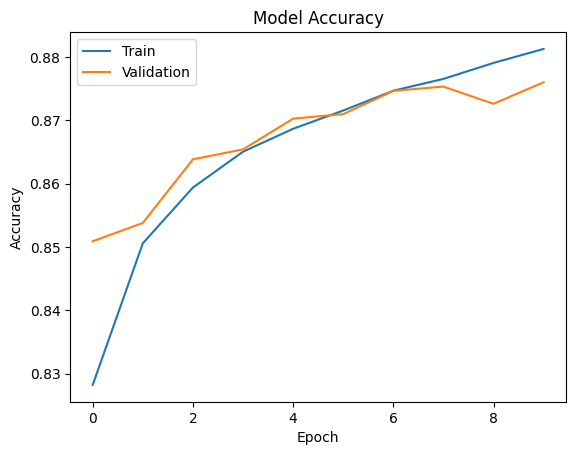

In [119]:
model_train[['accuracy','val_accuracy']].plot()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()


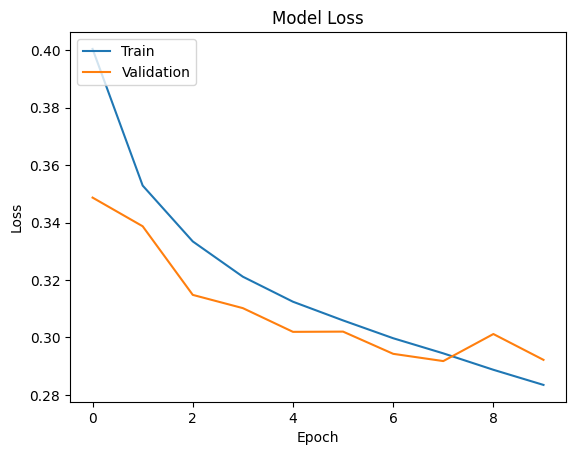

In [120]:
model_train[['loss','val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()